In [1]:
data <- read.csv("new_chr8_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
105211,chr8_3001900,3001800,3,8,11,100.000000,57.894737
47480,chr8_3001900,3001800,2,0,8,0.000000,42.105263
105212,chr8_3003200,3003100,3,4,10,44.444444,58.823529
47481,chr8_3003200,3003100,2,5,7,55.555556,41.176471
105213,chr8_3004400,3004300,3,21,19,53.846154,55.882353
47482,chr8_3004400,3004300,2,11,11,28.205128,32.352941
1,chr8_3004400,3004300,1,7,4,17.948718,11.764706
105214,chr8_3005100,3005000,3,75,139,83.333333,78.531073
47483,chr8_3005100,3005000,2,11,32,12.222222,18.079096
2,chr8_3005100,3005000,1,4,6,4.444444,3.389831


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
14802,chr8_3001900,3001800,8,0,0
14811,chr8_3003200,3003100,4,5,0
14822,chr8_3004400,3004300,21,11,7
14823,chr8_3005100,3005000,75,11,4
14852,chr8_3012200,3012100,10,0,0
14860,chr8_3014100,3014000,12,2,0
14861,chr8_3014200,3014100,37,18,0
14862,chr8_3014300,3014200,25,3,0
14866,chr8_3014900,3014800,10,9,0
14871,chr8_3015600,3015500,21,0,0


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 61734"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
14802,chr8_3001900,3001800,8,0,0,0
14811,chr8_3003200,3003100,4,5,0,1300
14822,chr8_3004400,3004300,21,11,7,1200
14823,chr8_3005100,3005000,75,11,4,700
14852,chr8_3012200,3012100,10,0,0,7100
14860,chr8_3014100,3014000,12,2,0,1900
14861,chr8_3014200,3014100,37,18,0,100
14862,chr8_3014300,3014200,25,3,0,100
14866,chr8_3014900,3014800,10,9,0,600
14871,chr8_3015600,3015500,21,0,0,700


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
14802,chr8_3001900,3001800,8,0,0,0
14861,chr8_3014200,3014100,37,18,0,100
14862,chr8_3014300,3014200,25,3,0,100
14873,chr8_3015700,3015600,27,3,0,100
14875,chr8_3015800,3015700,17,16,0,100
14900,chr8_3019900,3019800,44,18,9,100


,binID,start,high,medium,low,dist
14861,chr8_3014200,3014100,37,18,0,100
14862,chr8_3014300,3014200,25,3,0,100
14873,chr8_3015700,3015600,27,3,0,100
14875,chr8_3015800,3015700,17,16,0,100
14900,chr8_3019900,3019800,44,18,9,100
14903,chr8_3020000,3019900,75,28,4,100


[1] 8518

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3014000   3014100   3014200   3015500   3015600   3015700   3019700
    [8]   3019800   3019900   3027700   3027800   3031700   3031800   3032600
   [15]   3032700   3047800   3047900   3048000   3049300   3049400   3049800
   [22]   3049900   3059600   3059700   3059800   3059900   3060200   3060300
   [29]   3060600   3060700   3060900   3061000   3061100   3062300   3062400
   [36]   3062800   3062900   3065600   3065700   3065800   3066700   3066800
   [43]   3066900   3067600   3067700   3067800   3068700   3068800   3083800
   [50]   3083900   3084100   3084200   3084300   3084900   3085000   3085100
   [57]   3085200   3085300   3141800   3141900   3142400   3142500   3163200
   [64]   3163300   3258400   3258500   3268000   3268100   3279800   3279900
   [71]   3280000   3309600   3309700   3309800   3309900   3337800   3337900
   [78]   3351500   3351600   3353000   3353100   3355100   3355200   3360900
   [85]   3361000   3393300   3393400   3393500   3415800   3415900   3416500
   [92]   3416600   3417100   3417200   3452100   3452200   3454300   3454400
   [99]   3458200   3458300   3482400   3482500   3484000   3484100   3496400
  [106]   3496500   3500100   3500200   3509000   3509100   3515500   3515600
  [113]   3516600   3516700   3528100   3528200   3534700   3534800   3541300
  [120]   3541400   3541500   3541600   3542700   3542800   3542900   3581800
  [127]   3581900   3584100   3584200   3604600   3604700   3604800   3607500
  [134]   3607600   3607700   3608600   3608700   3612900   3613000   3613500
  [141]   3613600   3616000   3616100   3621400   3621500   3628000   3628100
  [148]   3630000   3630100   3637200   3637300   3643500   3643600   3666000
  [155]   3666100   3667400   3667500   3670800   3670900   3671000   3679200
  [162]   3679300   3679400   3712900   3713000   3756800   3756900   3757000
  [169]   3760600   3760700   3760800   3761800   3761900   3763800   3763900
  [176]   3764000   3764400   3764500   3771400   3771500   3771600   3777100
  [183]   3777200   3777400   3777500   3783200   3783300   3793700   3793800
  [190]   3793900   3794200   3794300   3804200   3804300   3805100   3805200
  [197]   3807800   3807900   3808000   3808100   3808200   3829700   3829800
  [204]   3830300   3830400   3830500   3831100   3831200   3831300   3831400
  [211]   3831500   3831600   3831700   3837700   3837800   3839100   3839200
  [218]   3840100   3840200   3844300   3844400   3868400   3868500   3868600
  [225]   3905900   3906000   3929100   3929200   3946000   3946100   3961400
  [232]   3961500   3981100   3981200   3981800   3981900   3989200   3989300
  [239]   3991400   3991500   3994500   3994600   3995200   3995300   3995600
  [246]   3995700   3996600   3996700   3996800   3996900   3997200   3997300
  [253]   4007300   4007400   4073400   4073500   4082000   4082100   4089500
  [260]   4089600   4093900   4094000   4104400   4104500   4131900   4132000
  [267]   4132200   4132300   4134900   4135000   4136200   4136300   4144000
  [274]   4144100   4144200   4165800   4165900   4166000   4182100   4182200
  [281]   4183600   4183700   4197800   4197900   4214100   4214200   4214900
  [288]   4215000   4226900   4227000   4231100   4231200   4235700   4235800
  [295]   4235900   4242100   4242200   4248200   4248300   4252800   4252900
  [302]   4253500   4253600   4253700   4253800   4260900   4261000   4264300
  [309]   4264400   4305200   4305300   4311600   4311700   4325800   4325900
  [316]   4326000   4345200   4345300   4347700   4347800   4371500   4371600
  [323]   4376500   4376600   4379900   4380000   4380200   4380300   4389300
  [330]   4389400   4391800   4391900   4392400   4392500   4392600   4392700
  [337]   4402800   4402900   4404000   4404100   4408200   4408300   4408400
  [344]   4408500   4432800   4432900   4443400   4443500   4446900   4447000
  [351]   4465500   4465600   4465700   4474700   4474800   4487900   4488000
  [358]   4491500   449160

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
14860,chr8_3014100,3014000,12,2,0
14861,chr8_3014200,3014100,37,18,0
14862,chr8_3014300,3014200,25,3,0
14871,chr8_3015600,3015500,21,0,0
14873,chr8_3015700,3015600,27,3,0
14875,chr8_3015800,3015700,17,16,0
14899,chr8_3019800,3019700,43,6,4
14900,chr8_3019900,3019800,44,18,9
14903,chr8_3020000,3019900,75,28,4
14943,chr8_3027800,3027700,124,66,7


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
14861,chr8_3014200,3014100,0.30397043265233
14862,chr8_3014300,3014200,0.0556098904817829
14871,chr8_3015600,3015500,0
14873,chr8_3015700,3015600,0.373933689515972
14875,chr8_3015800,3015700,0.00229393719185989
14899,chr8_3019800,3019700,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
14861,chr8_3014200,3014100,0.30397043265233
14862,chr8_3014300,3014200,0.0556098904817829
14873,chr8_3015700,3015600,0.373933689515972
14900,chr8_3019900,3019800,0.0659994127970782
14903,chr8_3020000,3019900,0.0780681786175826
14971,chr8_3032800,3032700,0.666070437588127


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3014000   3014100   3014200   3015500   3015600   3019700   3019800
   [8]   3019900   3032600   3032700   3047800   3047900   3048000   3049800
  [15]   3049900   3059600   3059700   3060200   3060300   3062300   3062400
  [22]   3062800   3062900   3066700   3066800   3066900   3068700   3068800
  [29]   3083800   3083900   3084100   3084200   3084300   3141800   3141900
  [36]   3163200   3163300   3309600   3309700   3309800   3309900   3360900
  [43]   3361000   3393300   3393400   3417100   3417200   3509000   3509100
  [50]   3516600   3516700   3541300   3541400   3542800   3542900   3607500
  [57]   3607600   3608600   3608700   3616000   3616100   3621400   3621500
  [64]   3630000   3630100   3670900   3671000   3679200   3679300   3679400
  [71]   3712900   3713000   3756800   3756900   3763800   3763900   3764000
  [78]   3764400   3764500   3771500   3771600   3777100   3777200   3777400
  [85]   3777500   3804200   3804300   3805100   3805200   3807800   3807900
  [92]   3808000   3808100   3808200   3829700   3829800   3830300   3830400
  [99]   3830500   3831100   3831200   3831300   3831400   3831500   3831600
 [106]   3831700   3840100   3840200   3868500   3868600   3929100   3929200
 [113]   3994500   3994600   4082000   4082100   4093900   4094000   4132200
 [120]   4132300   4134900   4135000   4144000   4144100   4144200   4165800
 [127]   4165900   4197800   4197900   4235800   4235900   4260900   4261000
 [134]   4264300   4264400   4325800   4325900   4345200   4345300   4347700
 [141]   4347800   4380200   4380300   4392500   4392600   4392700   4446900
 [148]   4447000   4474700   4474800   4491500   4491600   4507500   4507600
 [155]   4519000   4519100   4546500   4546600   4576900   4577000   4612200
 [162]   4612300   4628800   4628900   4642600   4642700   4678500   4678600
 [169]   4681500   4681600   4681700   4686000   4686100   4707900   4708000
 [176]   4719100   4719200   4721100   4721200   4722300   4722400   4850400
 [183]   4850500   4854500   4854600   4856600   4856700   4892000   4892100
 [190]   4929900   4930000   4944000   4944100   4945900   4946000   4946100
 [197]   4946200   4959700   4959800   4959900   4963900   4964000   4964100
 [204]   4964200   4965300   4965400   4965900   4966000   4966100   4966200
 [211]   5044600   5044700   5203500   5203600   5218300   5218400   5223800
 [218]   5223900   5242000   5242100   5242200   5302600   5302700   5440900
 [225]   5441000   5529500   5529600   5531000   5531100   5556800   5556900
 [232]   5569900   5570000   5570900   5571000   5776000   5776100   5784700
 [239]   5784800   5784900   5785000   5796800   5796900   5798300   5798400
 [246]   5799100   5799200   5819200   5819300   5997300   5997400   6004300
 [253]   6004400   6054800   6054900   6077900   6078000   6157500   6157600
 [260]   6230400   6230500   6319400   6319500   6400900   6401000   6481700
 [267]   6481800   6481900   6493500   6493600   6498800   6498900   6500200
 [274]   6500300   6559100   6559200   6608000   6608100   6719100   6719200
 [281]   6752900   6753000   6875900   6876000   6986100   6986200   6986300
 [288]   6987100   6987200   7031100   7031200   7042300   7042400   7137200
 [295]   7137300   7253200   7253300   7409500   7409600   7428200   7428300
 [302]   7505200   7505300   7615200   7615300   7693000   7693100   7697800
 [309]   7697900   7792500   7792600   7879000   7879100   7993000   7993100
 [316]   8048000   8048100   8089400   8089500   8136500   8136600   8168400
 [323]   8168500   8217900   8218000   8218200   8218300   8263800   8263900
 [330]   8308400   8308500   8335000   8335100   8370500   8370600   8377800
 [337]   8377900   8396600   8396700   8414600   8414700   8419900   8420000
 [344]   8427700   8427800   8441100   8441200   8470300   8470400   8489600
 [351]   8489700   8489800   8489900   8587200   8587300   8600000   8600100
 [358]   8629300   8629400   8638400   8638500   8661600   8661700   8701100

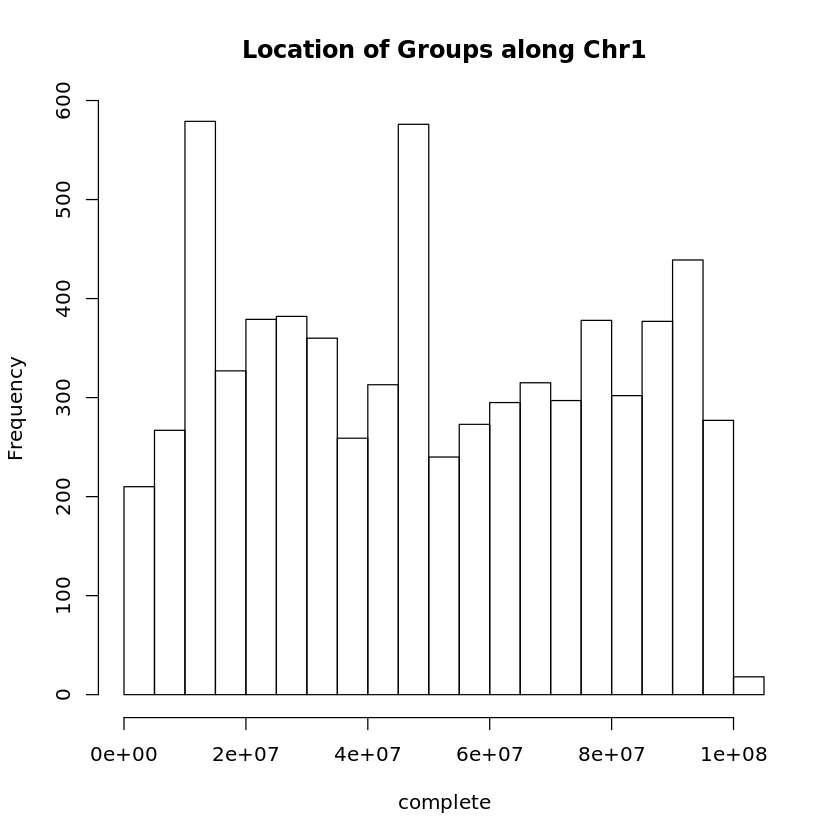

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
14860,chr8_3014100,3014000,12,2,0
14861,chr8_3014200,3014100,37,18,0
14862,chr8_3014300,3014200,25,3,0
14871,chr8_3015600,3015500,21,0,0
14873,chr8_3015700,3015600,27,3,0
14899,chr8_3019800,3019700,43,6,4
14900,chr8_3019900,3019800,44,18,9
14903,chr8_3020000,3019900,75,28,4
14970,chr8_3032700,3032600,20,17,0
14971,chr8_3032800,3032700,8,4,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 6863"

In [16]:
library(ggplot2)

In [ ]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [ ]:
part[20:60,]

In [ ]:
head(part)
tail(part)

In [ ]:
write.csv(part, "chr8_A_group.csv")

In [ ]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [ ]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [ ]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [ ]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [ ]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [ ]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [ ]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [ ]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [ ]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")